# Importing all necessary libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

%matplotlib inline

## Load Data

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,4b65dfadb1742b415136d191973da00d,42,385,3,58,24,0,0,0,Yes,...,0,4,18,0,2,1,87,87,66,Yes
1,3dc4e0a208acbfd793d585d61e4da5cd,85,180,1,77,0,0,0,0,No,...,0,0,0,0,0,0,17,17,3,Yes
2,23e106637070d37b8d8e1b681fdb54df,37,279,6,50,12,0,0,0,Yes,...,0,16,0,0,1,0,48,49,39,No
3,928fddf2335bb4d1211357b0c5abfad8,295,311,12,349,12,0,0,0,Yes,...,0,12,1,1,1,1,172,174,414,No
4,3d95d975bb58268c5664bd05166d14db,102,180,2,24,0,0,0,-1,unclear,...,1,0,1,0,0,0,10,10,4,Yes


## Get a brief summary for our PDF dataset.

In [3]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   MD5                      210339 non-null  object
 1   pdfsize                  210339 non-null  int64 
 2   metadata size            210339 non-null  int64 
 3   pages                    210339 non-null  int64 
 4   xref length              210339 non-null  int64 
 5   title characters         210339 non-null  int64 
 6   isEncrypted              210339 non-null  int64 
 7   embedded files           210339 non-null  int64 
 8   images                   210339 non-null  int64 
 9   contains text            210339 non-null  object
 10  header                   210339 non-null  object
 11  obj                      210339 non-null  int64 
 12  endobj                   210339 non-null  int64 
 13  stream                   210339 non-null  int64 
 14  endstream           

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(210339, 62)

## Check data types for our dataset

In [5]:

df_pdf.dtypes.value_counts()


int64     58
object     4
Name: count, dtype: int64

In [6]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
count,210339.000000,210339.000000,210339.000000,2.103390e+05,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,...,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000
mean,371.220164,567.017120,17.145218,1.233154e+03,99.544640,0.027318,0.003884,-0.026305,274.749642,274.813544,...,30.361112,0.827265,9.998317,9.814799,0.796861,1.259348,1.016973,336.815403,338.951359,585.950304
std,903.154355,1962.466237,48.838829,1.024080e+04,1512.407406,0.163125,0.101145,0.160042,1217.304837,1218.033083,...,266.854390,23.264933,58.621815,108.552334,1.864145,2.273504,4.852558,1302.581022,1311.675151,1626.091091
min,0.000000,4.000000,0.000000,2.000000e+00,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,24.000000,257.000000,1.000000,3.600000e+01,0.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,33.000000,22.000000
50%,67.000000,312.000000,3.000000,6.600000e+01,15.000000,0.000000,0.000000,0.000000,55.000000,55.000000,...,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,78.000000,78.000000,85.000000
75%,270.000000,369.000000,15.000000,2.030000e+02,36.000000,0.000000,0.000000,0.000000,141.000000,141.000000,...,5.000000,0.000000,12.000000,2.000000,1.000000,1.000000,1.000000,199.000000,200.000000,401.000000
max,50820.000000,80840.000000,2316.000000,1.179814e+06,80647.000000,1.000000,18.000000,0.000000,111656.000000,111656.000000,...,22824.000000,2749.000000,24347.000000,13204.000000,229.000000,212.000000,410.000000,124977.000000,124943.000000,87470.000000


## Check total Missing values.

In [7]:

sum(df_pdf.isnull().sum())


0

In [8]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [9]:
# Display Missing values for specific column
df_pdf[df_pdf.Malicious.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


In [10]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


## Visualize Bar chart of missing values

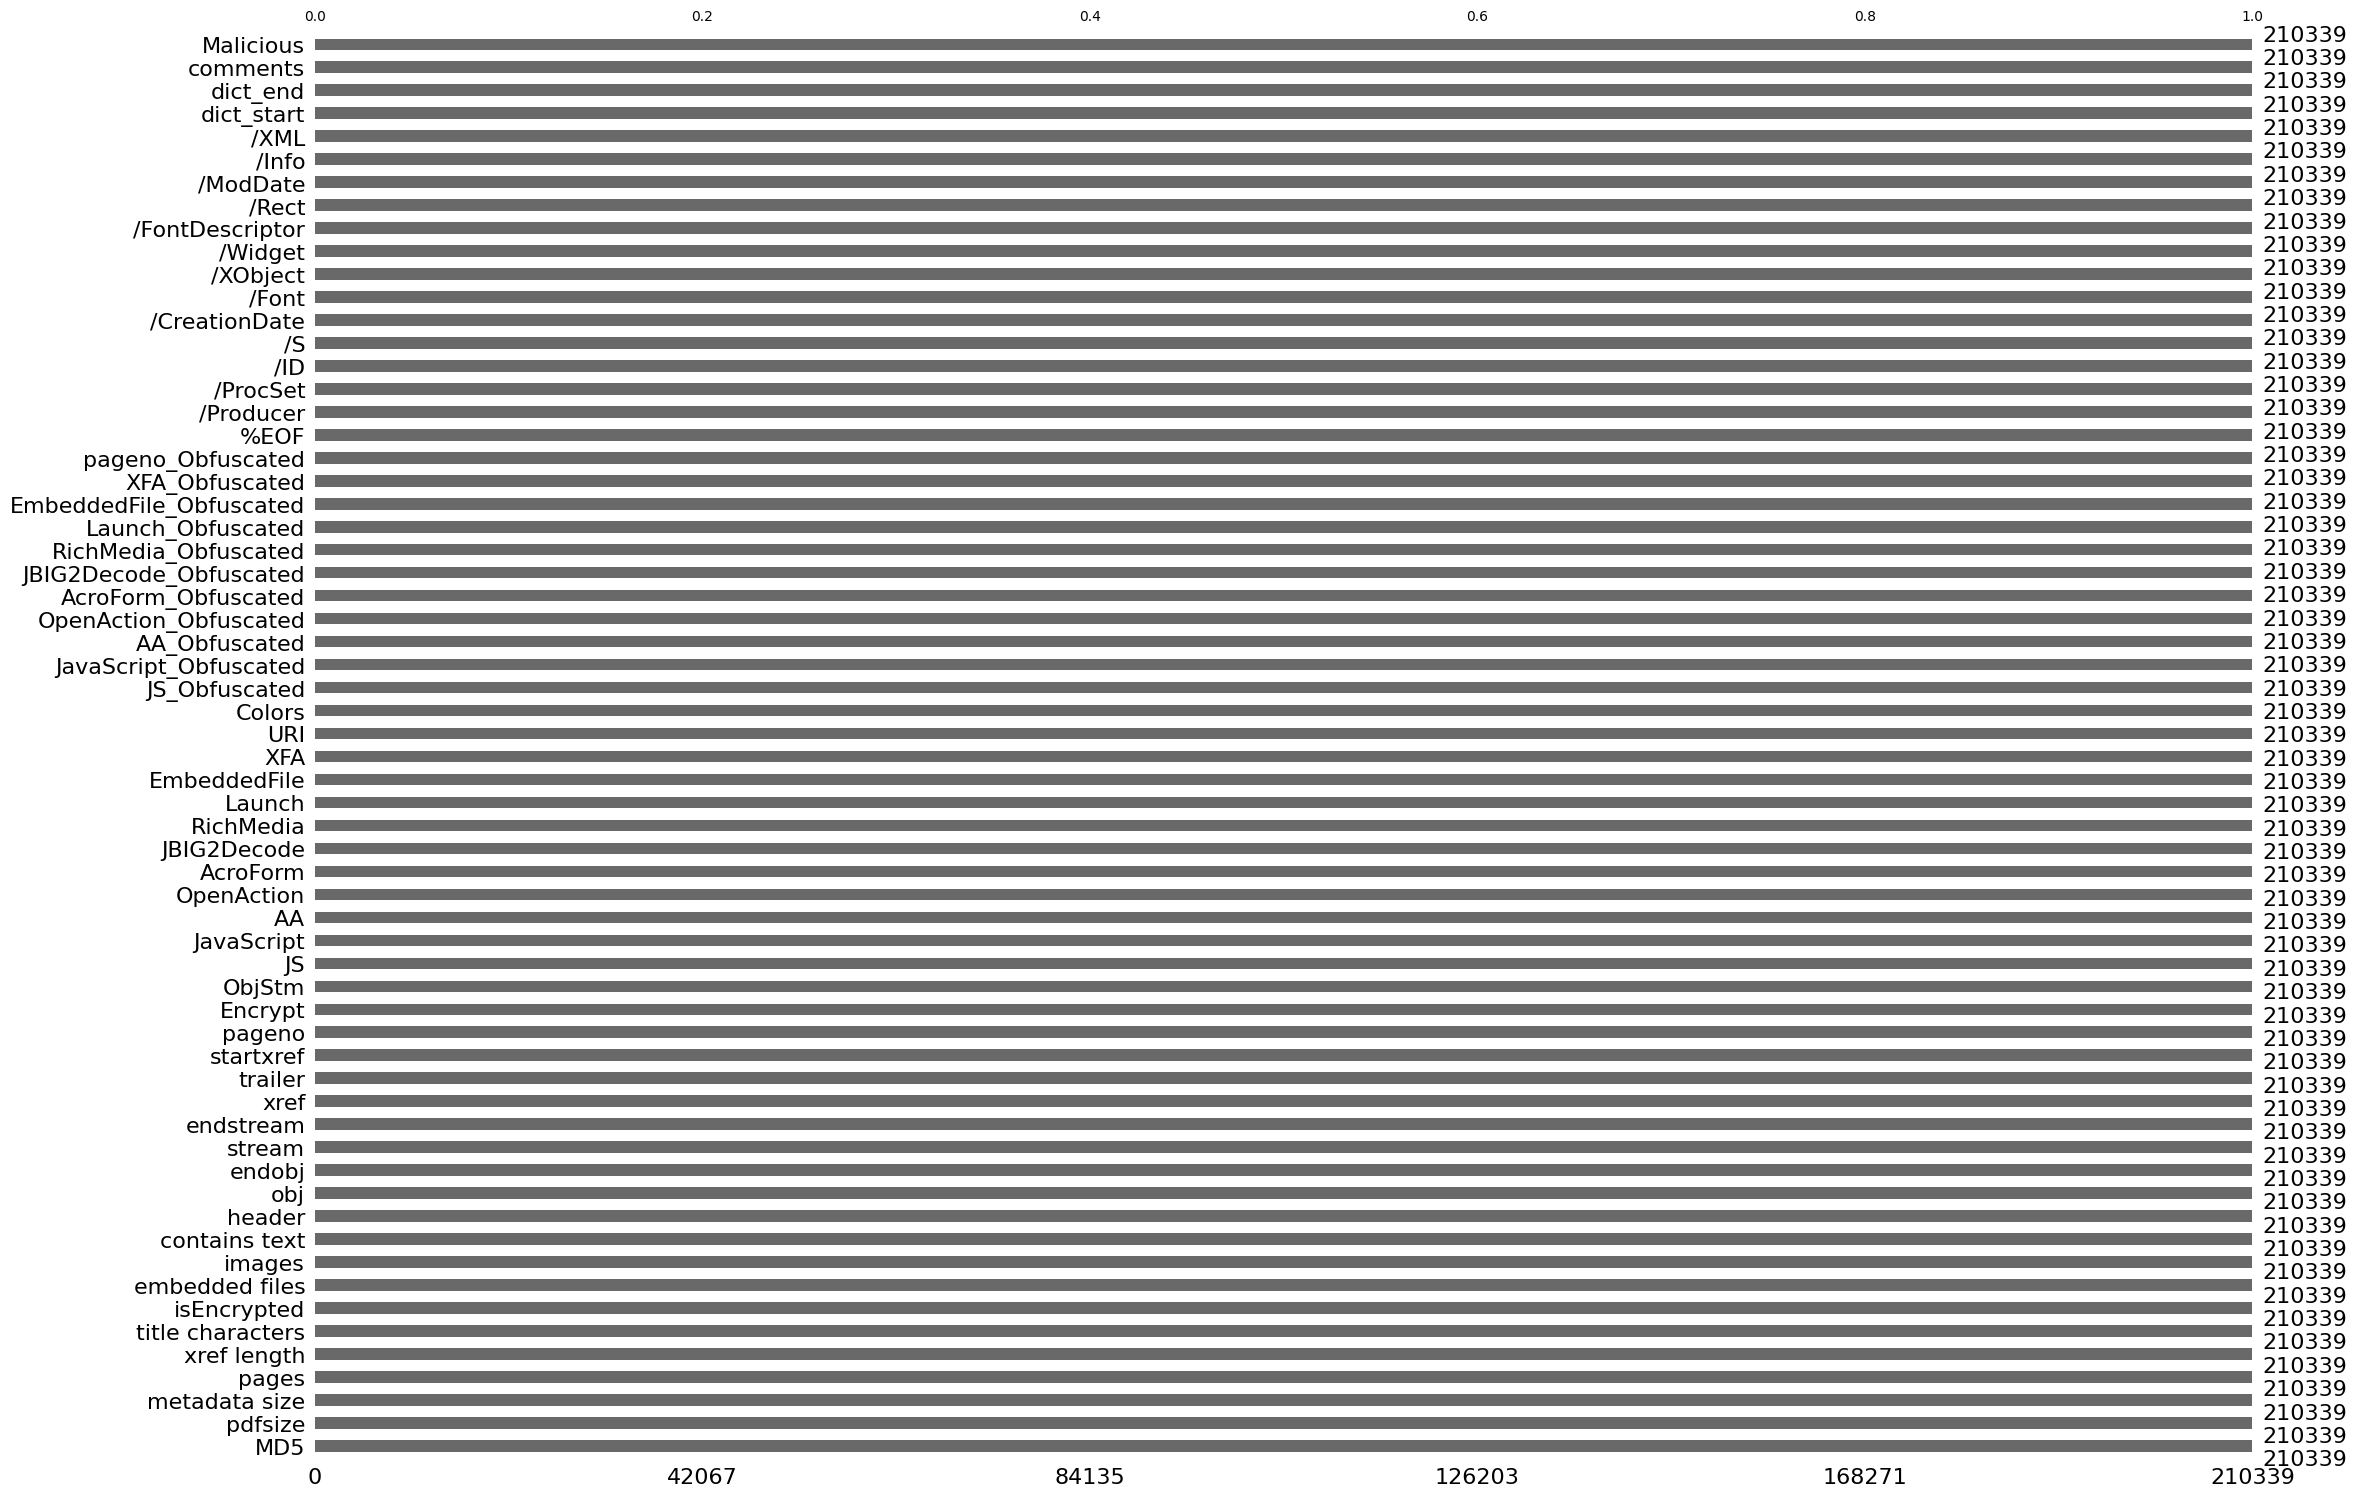

In [11]:

msno.bar(df_pdf);

In [12]:
# Check missing after applied imputation
df_pdf.isnull().sum()


MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [13]:
sum(df_pdf.isnull().sum())

0

In [14]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)

# Check values of each categorical column that have missing value/s


In [15]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 61 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   pdfsize                  210339 non-null  int64 
 1   metadata size            210339 non-null  int64 
 2   pages                    210339 non-null  int64 
 3   xref length              210339 non-null  int64 
 4   title characters         210339 non-null  int64 
 5   isEncrypted              210339 non-null  int64 
 6   embedded files           210339 non-null  int64 
 7   images                   210339 non-null  int64 
 8   contains text            210339 non-null  object
 9   header                   210339 non-null  object
 10  obj                      210339 non-null  int64 
 11  endobj                   210339 non-null  int64 
 12  stream                   210339 non-null  int64 
 13  endstream                210339 non-null  int64 
 14  xref                

In [16]:
# Check duplicate points in our dataset
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [17]:
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [18]:
# Drop duplicate rows
df_pdf = df_pdf.drop_duplicates()


In [19]:
df_pdf.Malicious.value_counts()


Malicious
No     56149
Yes    36862
Name: count, dtype: int64

In [20]:
data = df_pdf.copy()
data.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## Dropping Obfuscated Columns

In [21]:
data = data.drop(columns=[col for col in data.columns if col.endswith('_Obfuscated')])
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## result and text mapping

In [22]:
data["contains text"].unique()

array(['Yes', 'No', 'unclear'], dtype=object)

In [23]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 49] = data.iloc[:, 49].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,1


## Converting header values (text to float)

In [24]:
data["header"].unique()

array(['%PDF-1.4', '%PDF-1.6', '%PDF-1.2', '%PDF-1.3', '%PDF-1.5',
       '%PDF-1.7', 'Malformed', '%PDF-1.0', '%PDF-1.1'], dtype=object)

In [25]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

In [26]:
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


## Converting objects to numeric values

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93011 entries, 0 to 210332
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           93011 non-null  int64
 1   metadata size     93011 non-null  int64
 2   pages             93011 non-null  int64
 3   xref length       93011 non-null  int64
 4   title characters  93011 non-null  int64
 5   isEncrypted       93011 non-null  int64
 6   embedded files    93011 non-null  int64
 7   images            93011 non-null  int64
 8   contains text     93011 non-null  int64
 9   header            93011 non-null  int64
 10  obj               93011 non-null  int64
 11  endobj            93011 non-null  int64
 12  stream            93011 non-null  int64
 13  endstream         93011 non-null  int64
 14  xref              93011 non-null  int64
 15  trailer           93011 non-null  int64
 16  startxref         93011 non-null  int64
 17  pageno            93011 non-null  i

## Train-Test split

In [29]:
X = data.drop(columns=[ data.columns[49]])  # Adjusted indices
y = data.iloc[:, 49]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_test.value_counts()

Malicious
0    11213
1     7390
Name: count, dtype: int64

In [32]:
y_train.value_counts()

Malicious
0    44936
1    29472
Name: count, dtype: int64

# **RandomForest**

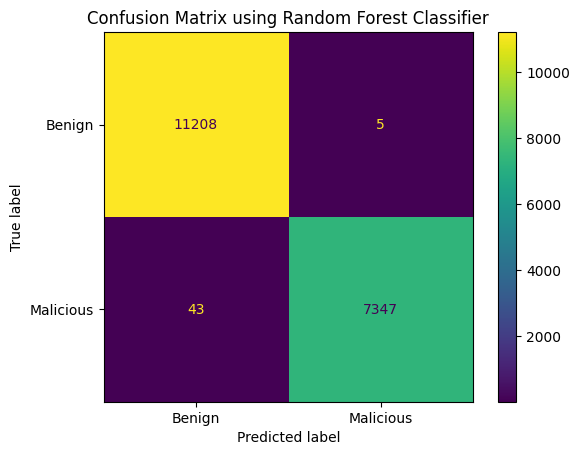

False Positive Rate: 0.00044591099616516543
True Positive Rate: 0.9941813261163734
Accuracy Score: 0.9974197710046767


In [33]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import shap

def analyze_feature_importance(X, y, n_features=10):
    """
    Analyze feature importance using multiple methods and return top features.

    Parameters:
    X : pandas DataFrame of features
    y : target variable
    n_features : number of top features to return

    Returns:
    dict : Dictionary containing results from different methods
    """
    results = {}

    # 1. Random Forest Feature Importance
    rf_importance = pd.DataFrame({
        'feature': data.columns[:-1],
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    results['random_forest'] = rf_importance.head(n_features)

    return results

# Example usage:

# Assuming you have your data in X (features) and y (target):
results = analyze_feature_importance(X_test, y_test, n_features=25)


# Print results from each method
for method, df in results.items():

    print(f"\n{method.upper()} Top Features:")
    print(df)



c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



RANDOM_FOREST Top Features:
            feature  importance
35              /ID    0.140699
29              XFA    0.107217
42            /Rect    0.089798
13        endstream    0.074536
43         /ModDate    0.060969
12           stream    0.060780
38            /Font    0.058749
34         /ProcSet    0.048772
20               JS    0.028663
2             pages    0.025925
41  /FontDescriptor    0.023362
3       xref length    0.023007
10              obj    0.022395
48         comments    0.021835
33        /Producer    0.019267
19           ObjStm    0.018547
1     metadata size    0.018242
11           endobj    0.016023
9            header    0.013991
0           pdfsize    0.013718
47         dict_end    0.010304
36               /S    0.009743
46       dict_start    0.009583
37    /CreationDate    0.009074
8     contains text    0.008139


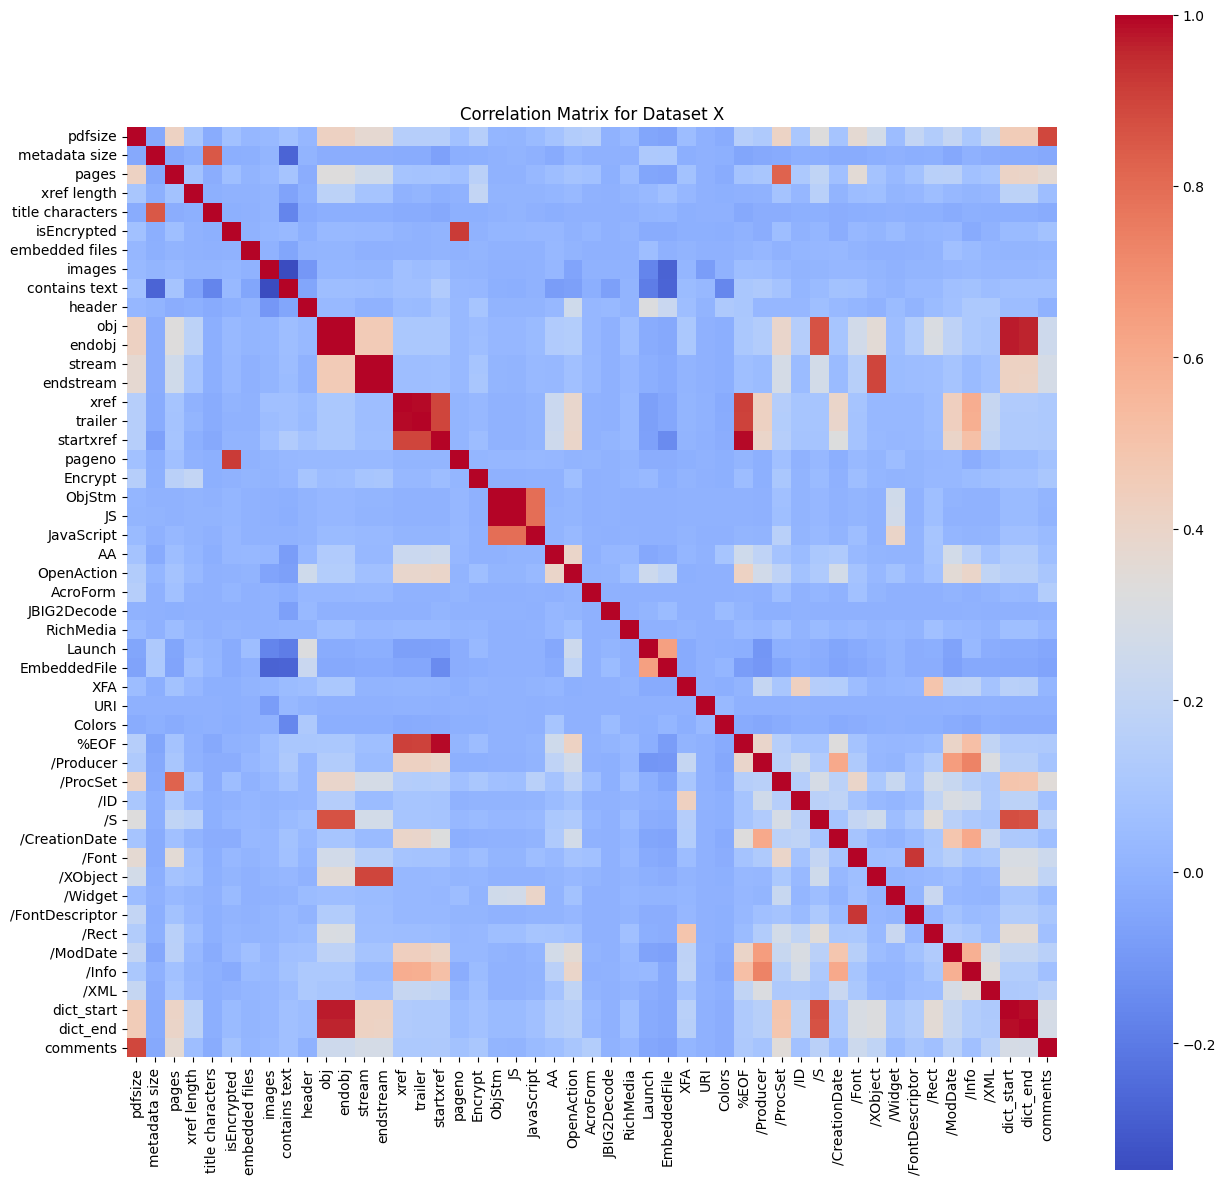

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with 49 features
# Generate a random dataset for demonstration
# X = pd.DataFrame(np.random.rand(100, 49), columns=[f"Feature_{i}" for i in range(1, 50)])

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Display the plot
plt.title("Correlation Matrix for Dataset X")
plt.show()


In [36]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Assuming 'X' is your dataset and 'y' are the labels
# Also, 'model' is a trained Random Forest model on this dataset

# Example: Train a random forest model for demonstration
# model = RandomForestClassifier()
# model.fit(X, y)

# Initialize the SHAP explainer with the model and data
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)

In [37]:
# Compute SHAP values
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)

100%|===================| 37190/37206 [41:58<00:01]        

In [38]:
shap_values.shape

(18603, 49, 2)

In [39]:
shap_values_1 = shap_values[:,:,1]  # This selects SHAP values for the positive class
shap_values_0 = shap_values[:,:,0]
print(np.shape(shap_values_1))

(18603, 49)


## Top features

In [40]:
mean_shap_values1 = pd.DataFrame(shap_values_1.values, columns=X_test.columns).abs().mean().sort_values(ascending=False)

# Get the top 15 features
top_15_features = mean_shap_values1.head(15)
print(top_15_features)

/Rect              0.065606
XFA                0.064651
/ID                0.063133
/ModDate           0.035961
/ProcSet           0.026069
JS                 0.023711
/Font              0.021220
xref length        0.017845
header             0.014458
pages              0.014084
contains text      0.013755
/FontDescriptor    0.013013
endobj             0.011206
/CreationDate      0.010556
obj                0.009336
dtype: float64


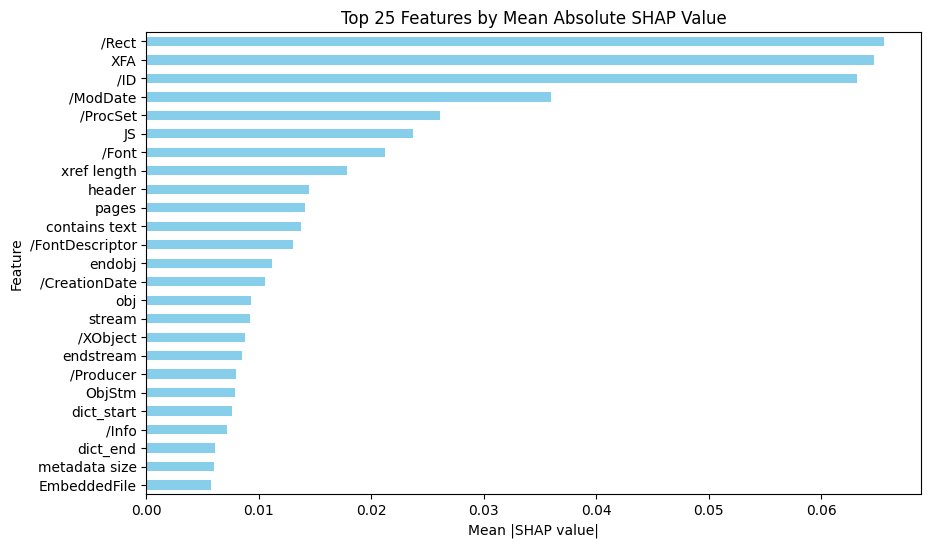

In [41]:
top_25_features = mean_shap_values1.head(25)
plt.figure(figsize=(10, 6))
top_25_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest SHAP value on top
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")
plt.title("Top 25 Features by Mean Absolute SHAP Value")
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_random_forest(n_top_features):
  top_features = mean_shap_values1.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  rf_top15 = RandomForestClassifier()  # or RandomForestRegressor()
  rf_top15.fit(X_train_top15, y_train)
  y_pred = rf_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [43]:
import json

results = evaluate_random_forest(n_top_features=15)
print(json.dumps(results, indent=4))

{
    "Accuracy": 0.9966134494436382,
    "Precision": 0.9985031977139747,
    "Recall": 0.9929634641407307,
    "F1 Score": 0.9957256258904946
}


In [44]:
results = evaluate_random_forest(n_top_features=10)
print(json.dumps(results, indent=4))


{
    "Accuracy": 0.9960221469655431,
    "Precision": 0.997145963577059,
    "Recall": 0.9928281461434371,
    "F1 Score": 0.994982370490914
}


In [45]:
results = evaluate_random_forest(n_top_features=20)
print(json.dumps(results, indent=4))

{
    "Accuracy": 0.9965059399021663,
    "Precision": 0.9983671247788815,
    "Recall": 0.9928281461434371,
    "F1 Score": 0.9955899314743198
}


In [46]:
results = evaluate_random_forest(n_top_features=25)
print(json.dumps(results, indent=4))

{
    "Accuracy": 0.9970434876095253,
    "Precision": 0.9990474894543475,
    "Recall": 0.9935047361299053,
    "F1 Score": 0.9962684035551937
}


In [47]:
results = evaluate_random_forest(n_top_features=5)
print(json.dumps(results, indent=4))

{
    "Accuracy": 0.9794119228081493,
    "Precision": 0.9924104005621925,
    "Recall": 0.9554803788903924,
    "F1 Score": 0.9735953119613926
}


# **GBM**

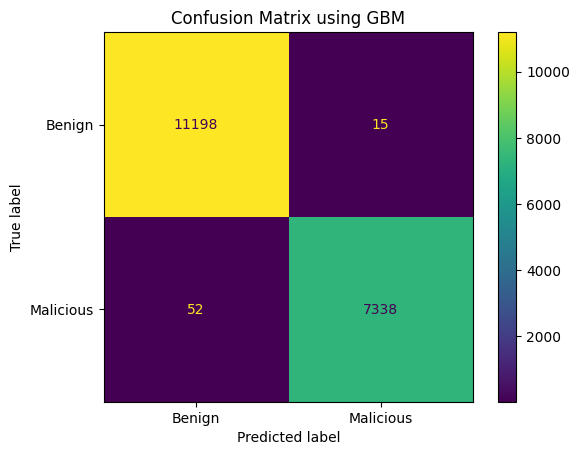

False Positive Rate: 0.0013377329884954963
True Positive Rate: 0.9929634641407307
Accuracy Score: 0.9963984303606945


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

# Make Predictions
y_pred_gbm = gbm.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gbm).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbm), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using GBM')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_gbm)}')

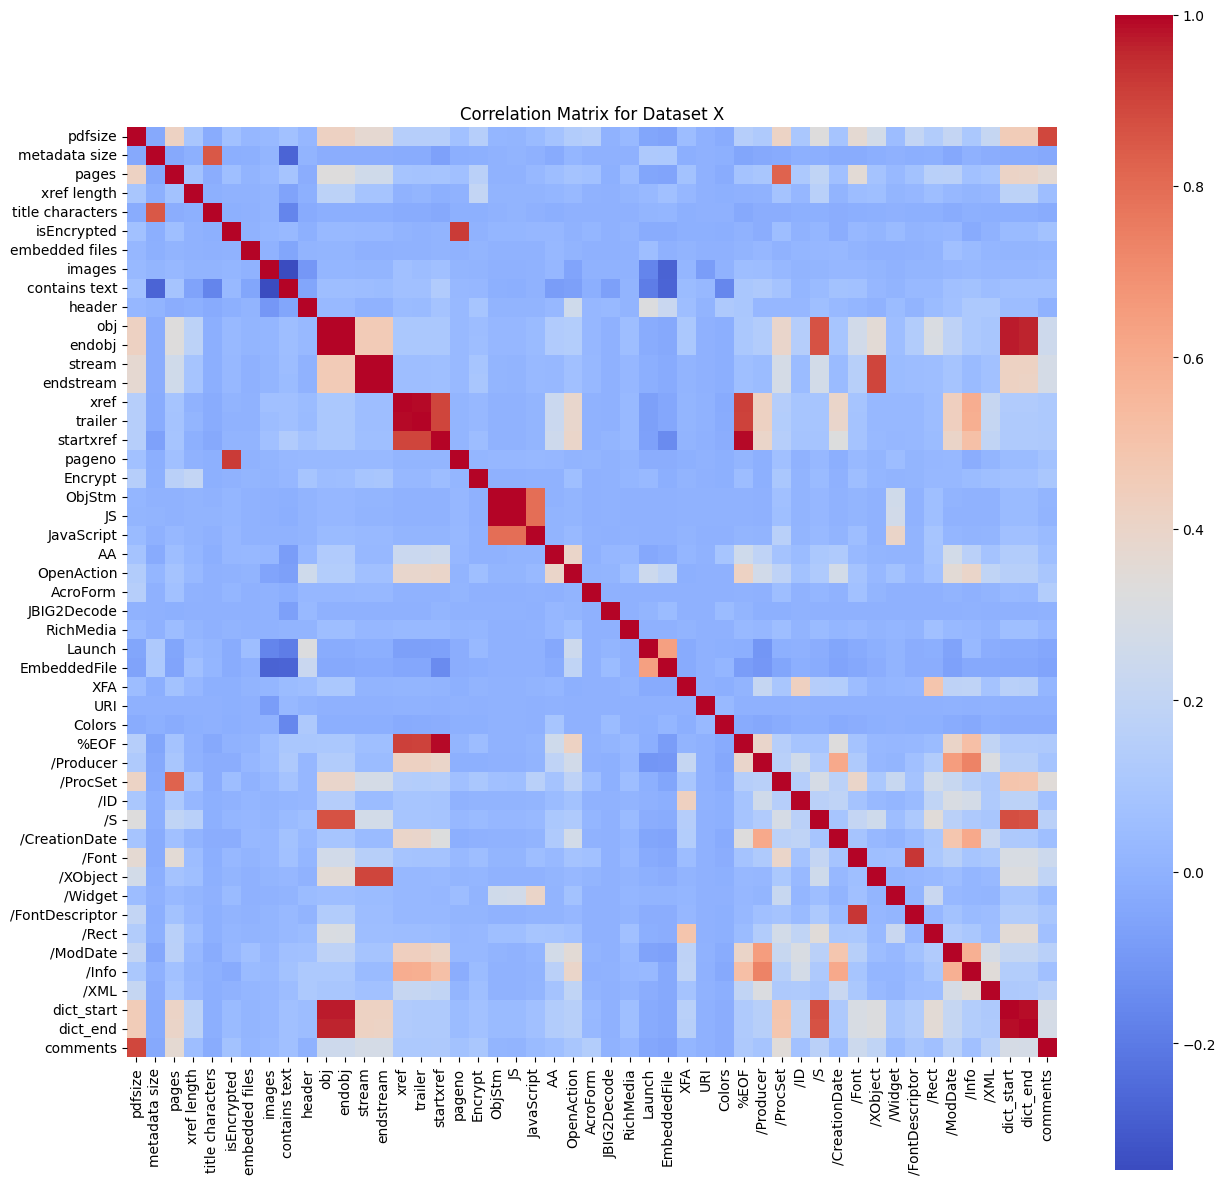

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with 49 features
# Generate a random dataset for demonstration
# X = pd.DataFrame(np.random.rand(100, 49), columns=[f"Feature_{i}" for i in range(1, 50)])

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Display the plot
plt.title("Correlation Matrix for Dataset X")
plt.show()


In [50]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Assuming 'X' is your dataset and 'y' are the labels
# Also, 'model' is a trained Random Forest model on this dataset

# Example: Train a random forest model for demonstration
# model = RandomForestClassifier()
# model.fit(X, y)

# Initialize the SHAP explainer with the model and data
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)

In [51]:
# Compute SHAP values
explainer = shap.Explainer(gbm, X_test)
shap_values = explainer(X_test)

 96%|=================== | 17786/18603 [00:17<00:00]       

In [52]:
shap_values.shape

(18603, 49)

## Top features

In [53]:
mean_shap_values2 = pd.DataFrame(shap_values.values, columns=X_test.columns).abs().mean().sort_values(ascending=False)

# Get the top 15 features
top_15_features = mean_shap_values2.head(15)
print(top_15_features)

/ID              1.480568
XFA              1.009036
/Rect            0.842415
JS               0.432476
pages            0.420836
/Font            0.390352
/ProcSet         0.355498
header           0.333923
/Info            0.213467
contains text    0.205748
AA               0.202756
/Producer        0.176194
startxref        0.133698
obj              0.133376
EmbeddedFile     0.123667
dtype: float64


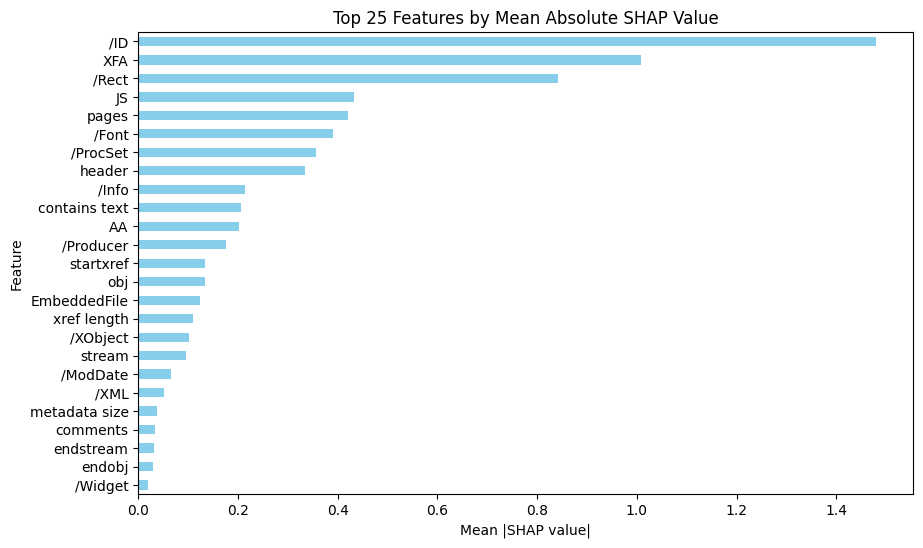

In [54]:
top_25_features = mean_shap_values2.head(25)
plt.figure(figsize=(10, 6))
top_25_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest SHAP value on top
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")
plt.title("Top 25 Features by Mean Absolute SHAP Value")
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_gbm(n_top_features):
  top_features = mean_shap_values2.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  gbm_top15 = GradientBoostingClassifier()  # or RandomForestRegressor()
  gbm_top15.fit(X_train_top15, y_train)
  y_pred = gbm_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [56]:
results = evaluate_gbm(n_top_features=15)
print(results)


{'Accuracy': 0.9950008063215611, 'Precision': np.float64(0.9964621036875766), 'Recall': np.float64(0.9909336941813262), 'F1 Score': np.float64(0.993690209647873)}


In [57]:
results = evaluate_gbm(n_top_features=10)
print(results)


{'Accuracy': 0.9933344084287481, 'Precision': np.float64(0.9941512513601741), 'Recall': np.float64(0.9890392422192151), 'F1 Score': np.float64(0.9915886582553249)}


In [58]:
results = evaluate_gbm(n_top_features=20)
print(results)


{'Accuracy': 0.9953233349459765, 'Precision': np.float64(0.9967351380764522), 'Recall': np.float64(0.9914749661705007), 'F1 Score': np.float64(0.9940980937521199)}


In [59]:
results = evaluate_gbm(n_top_features=25)
print(results)


{'Accuracy': 0.9952695801752406, 'Precision': np.float64(0.9960597826086957), 'Recall': np.float64(0.9920162381596752), 'F1 Score': np.float64(0.9940338983050847)}


In [60]:
results = evaluate_gbm(n_top_features=5)
print(results)


{'Accuracy': 0.9874751384185346, 'Precision': np.float64(0.9910800054892274), 'Recall': np.float64(0.9772665764546685), 'F1 Score': np.float64(0.9841248211487361)}


# **XGboost**

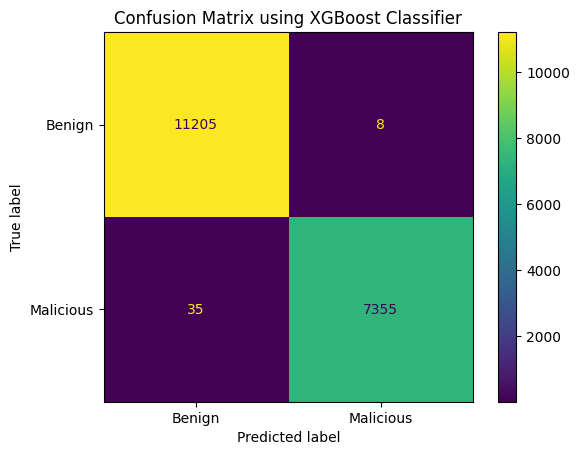

False Positive Rate: 0.0007134575938642646
True Positive Rate: 0.9952638700947226
Accuracy Score: 0.9976885448583562


In [61]:
# Import the XGBoost classifier
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=0.1, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using XGBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}')

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import shap

def analyze_feature_importance(X, y, n_features=10):
    """
    Analyze feature importance using multiple methods and return top features.

    Parameters:
    X : pandas DataFrame of features
    y : target variable
    n_features : number of top features to return

    Returns:
    dict : Dictionary containing results from different methods
    """
    results = {}

    # 1. Random Forest Feature Importance
    rf_importance = pd.DataFrame({
        'feature': data.columns[:-1],
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    results['random_forest'] = rf_importance.head(n_features)

    return results

# Example usage:

# Assuming you have your data in X (features) and y (target):
results = analyze_feature_importance(X_test, y_test, n_features=25)


# Print results from each method
for method, df in results.items():

    print(f"\n{method.upper()} Top Features:")
    print(df)




RANDOM_FOREST Top Features:
            feature  importance
35              /ID    0.140699
29              XFA    0.107217
42            /Rect    0.089798
13        endstream    0.074536
43         /ModDate    0.060969
12           stream    0.060780
38            /Font    0.058749
34         /ProcSet    0.048772
20               JS    0.028663
2             pages    0.025925
41  /FontDescriptor    0.023362
3       xref length    0.023007
10              obj    0.022395
48         comments    0.021835
33        /Producer    0.019267
19           ObjStm    0.018547
1     metadata size    0.018242
11           endobj    0.016023
9            header    0.013991
0           pdfsize    0.013718
47         dict_end    0.010304
36               /S    0.009743
46       dict_start    0.009583
37    /CreationDate    0.009074
8     contains text    0.008139


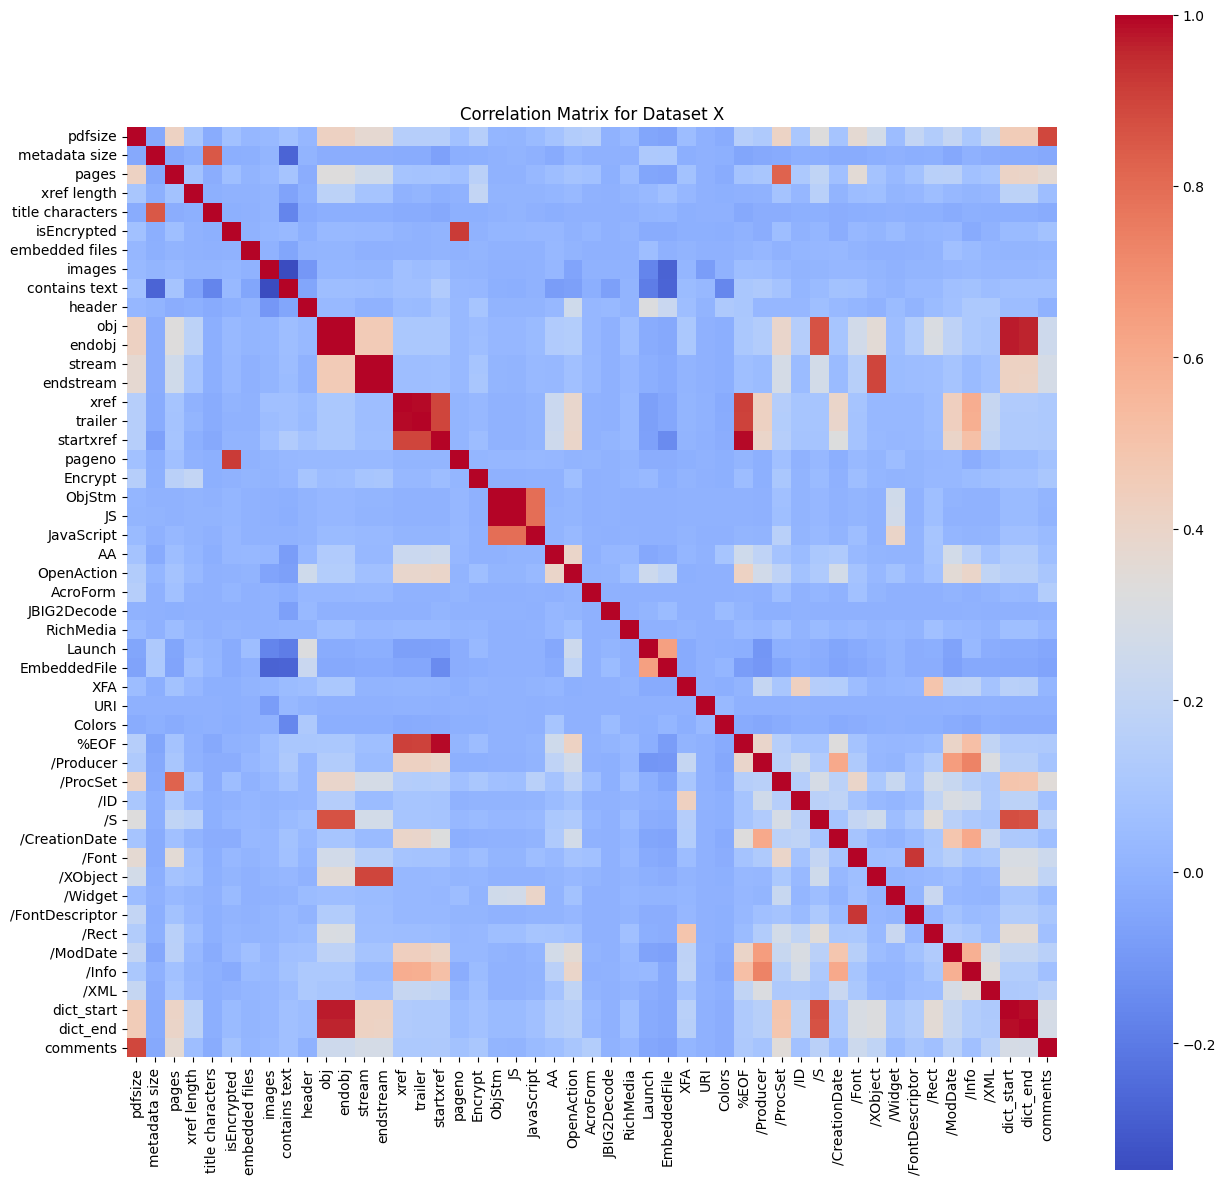

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with 49 features
# Generate a random dataset for demonstration
# X = pd.DataFrame(np.random.rand(100, 49), columns=[f"Feature_{i}" for i in range(1, 50)])

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Display the plot
plt.title("Correlation Matrix for Dataset X")
plt.show()


In [64]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Assuming 'X' is your dataset and 'y' are the labels
# Also, 'model' is a trained Random Forest model on this dataset

# Example: Train a random forest model for demonstration
# model = RandomForestClassifier()
# model.fit(X, y)

# Initialize the SHAP explainer with the model and data
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)

In [65]:
# Compute SHAP values
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)

100%|===================| 18539/18603 [04:37<00:00]        

In [66]:
shap_values.shape

(18603, 49)

## Top features

In [67]:
mean_shap_values3 = pd.DataFrame(shap_values.values, columns=X_test.columns).abs().mean().sort_values(ascending=False)

# Get the top 15 features
top_15_features = mean_shap_values3.head(15)
print(top_15_features)

/ID                 2.226749
XFA                 1.804459
/Rect               0.892759
JS                  0.722650
pages               0.683517
/ModDate            0.649093
header              0.592583
/ProcSet            0.451183
xref length         0.409649
contains text       0.367177
/FontDescriptor     0.325205
/XObject            0.279190
metadata size       0.261475
title characters    0.261199
comments            0.256179
dtype: float64


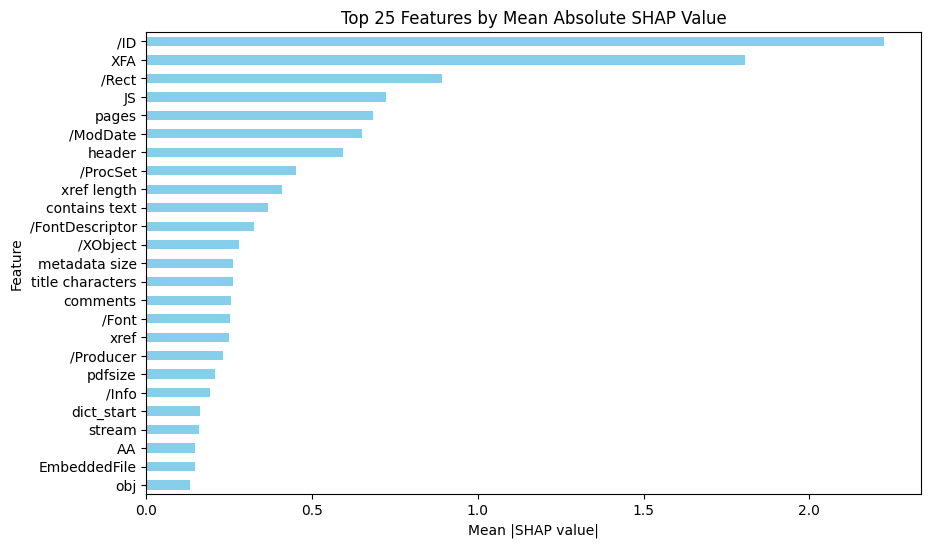

In [68]:
top_25_features = mean_shap_values3.head(25)
plt.figure(figsize=(10, 6))
top_25_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest SHAP value on top
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")
plt.title("Top 25 Features by Mean Absolute SHAP Value")
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_xgb(n_top_features):
  top_features = mean_shap_values3.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  xgb_top15 = XGBClassifier()  # or RandomForestRegressor()
  xgb_top15.fit(X_train_top15, y_train)
  y_pred = xgb_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [70]:
results = evaluate_xgb(n_top_features=15)
print(results)


{'Accuracy': 0.9969359780680536, 'Precision': np.float64(0.9980980844993886), 'Recall': np.float64(0.9941813261163734), 'F1 Score': np.float64(0.9961358551962579)}


In [71]:
results = evaluate_xgb(n_top_features=10)
print(results)


{'Accuracy': 0.9959146374240714, 'Precision': np.float64(0.9960661964188823), 'Recall': np.float64(0.9936400541271989), 'F1 Score': np.float64(0.9948516461184121)}


In [72]:
results = evaluate_xgb(n_top_features=20)
print(results)


{'Accuracy': 0.9976885448583562, 'Precision': np.float64(0.9983719983719984), 'Recall': np.float64(0.9958051420838971), 'F1 Score': np.float64(0.9970869182304722)}


In [73]:
results = evaluate_xgb(n_top_features=25)
print(results)


{'Accuracy': 0.9975810353168844, 'Precision': np.float64(0.9985068548934437), 'Recall': np.float64(0.9953991880920162), 'F1 Score': np.float64(0.9969505997153894)}


In [74]:
results = evaluate_xgb(n_top_features=5)
print(results)


{'Accuracy': 0.9882814599795732, 'Precision': np.float64(0.9925824175824176), 'Recall': np.float64(0.977807848443843), 'F1 Score': np.float64(0.9851397409679619)}


In [75]:
# Function to store all evaluation results
def collect_all_results():
    feature_counts = [5, 10, 15, 20, 25]
    all_results = []
    
    # For Random Forest
    for n_features in feature_counts:
        rf_results = evaluate_random_forest(n_features)
        all_results.append({
            'Model': 'Random Forest',
            'Features': n_features,
            'Accuracy': rf_results['Accuracy'],
            'Precision': rf_results['Precision'],
            'Recall': rf_results['Recall'],
            'F1 Score': rf_results['F1 Score']
        })
    
    # For GBM
    for n_features in feature_counts:
        gbm_results = evaluate_gbm(n_features)  # Using the same evaluation function but with GBM
        all_results.append({
            'Model': 'GBM',
            'Features': n_features,
            'Accuracy': gbm_results['Accuracy'],
            'Precision': gbm_results['Precision'],
            'Recall': gbm_results['Recall'],
            'F1 Score': gbm_results['F1 Score']
        })
    
    # For XGBoost
    for n_features in feature_counts:
        xgb_results = evaluate_xgb(n_features)  # Using the same evaluation function but with XGBoost
        all_results.append({
            'Model': 'XGBoost',
            'Features': n_features,
            'Accuracy': xgb_results['Accuracy'],
            'Precision': xgb_results['Precision'],
            'Recall': xgb_results['Recall'],
            'F1 Score': xgb_results['F1 Score']
        })
    
    return pd.DataFrame(all_results)

# Create and display the results table
results_df = collect_all_results()

# Format percentages
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    results_df[col] = results_df[col].apply(lambda x: f"{x*100:.2f}%")

# Display full results table with styling
print("\nAll Results:")
styled_df = results_df.style.set_properties(**{
    'text-align': 'center',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center'), 
               ('background-color', '#f2f2f2'),
               ('padding', '10px')]},
    {'selector': 'td',
     'props': [('text-align', 'center'),
               ('padding', '10px')]}
])
display(styled_df)

# Find best model for each feature count
# Convert percentage strings back to floats for comparison
results_df_numeric = results_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    results_df_numeric[col] = results_df_numeric[col].str.rstrip('%').astype('float') / 100

best_results = results_df_numeric.loc[results_df_numeric.groupby('Features')['F1 Score'].idxmax()]

# Format percentages again for display
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    best_results[col] = best_results[col].apply(lambda x: f"{x*100:.2f}%")

# Display best results table
print("\nBest Model for Each Feature Count:")
styled_best_df = best_results.style.set_properties(**{
    'text-align': 'center',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center'), 
               ('background-color', '#f2f2f2'),
               ('padding', '10px')]},
    {'selector': 'td',
     'props': [('text-align', 'center'),
               ('padding', '10px')]}
])
display(styled_best_df)



All Results:


,Model,Features,Accuracy,Precision,Recall,F1 Score
0,Random Forest,5,97.91%,99.17%,95.53%,97.32%
1,Random Forest,10,99.63%,99.81%,99.27%,99.54%
2,Random Forest,15,99.65%,99.80%,99.31%,99.55%
3,Random Forest,20,99.68%,99.88%,99.31%,99.59%
4,Random Forest,25,99.70%,99.92%,99.34%,99.63%
5,GBM,5,98.75%,99.11%,97.73%,98.41%
6,GBM,10,99.33%,99.42%,98.90%,99.16%
7,GBM,15,99.50%,99.65%,99.09%,99.37%
8,GBM,20,99.53%,99.67%,99.13%,99.40%
9,GBM,25,99.53%,99.62%,99.20%,99.41%



Best Model for Each Feature Count:


,Model,Features,Accuracy,Precision,Recall,F1 Score
10,XGBoost,5,98.83%,99.26%,97.78%,98.51%
1,Random Forest,10,99.63%,99.81%,99.27%,99.54%
12,XGBoost,15,99.69%,99.81%,99.42%,99.61%
13,XGBoost,20,99.77%,99.84%,99.58%,99.71%
14,XGBoost,25,99.76%,99.85%,99.54%,99.70%


In [76]:
Hdf = pd.read_csv('MalwareBazaar.csv')

# Add 'Malicious' column with 'Yes' values
Hdf['Malicious'] = 'Yes'

In [77]:
Hdf.drop('MD5', axis=1, inplace=True)

In [78]:
Hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pdfsize                  526 non-null    int64 
 1   metadata size            526 non-null    int64 
 2   pages                    526 non-null    int64 
 3   xref length              526 non-null    int64 
 4   title characters         526 non-null    int64 
 5   isEncrypted              526 non-null    int64 
 6   embedded files           526 non-null    int64 
 7   images                   526 non-null    int64 
 8   contains text            526 non-null    object
 9   header                   526 non-null    object
 10  obj                      526 non-null    int64 
 11  endobj                   526 non-null    int64 
 12  stream                   526 non-null    int64 
 13  endstream                526 non-null    int64 
 14  xref                     526 non-null    i

In [79]:
# Check duplicate points in our dataset
Hdf.duplicated().sum() # No duplicates

np.int64(31)

In [80]:
Hdf=Hdf.dropna()
Hdf.duplicated().sum() # No duplicates

np.int64(31)

In [81]:
# Drop duplicate rows
Hdf = Hdf.drop_duplicates()


In [82]:
Hdf.Malicious.value_counts()


Malicious
Yes    495
Name: count, dtype: int64

In [83]:
Hdata = Hdf.copy()
Hdata.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,Yes
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,Yes
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,Yes
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,Yes
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,Yes


In [84]:
Hdata = Hdata.drop(columns=[col for col in Hdata.columns if col.endswith('_Obfuscated')])
Hdata.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,Yes
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,Yes
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,Yes
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,Yes
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,Yes


In [85]:
Hdata["contains text"].unique()

array(['Yes', 'No', 'unclear'], dtype=object)

In [86]:
# Assuming df_pdf is your DataFrame
Hdata.iloc[:, 49] = Hdata.iloc[:, 49].map({'Yes': 1, 'No': 0})
Hdata.iloc[:, 8] = Hdata.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
Hdata.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,1,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,1
1,192,314,1,136,8,0,0,0,1,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,1
2,32,290,1,8,0,0,0,0,0,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,1
3,0,275,1,7,19,0,0,0,0,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,1
4,59,212,1,13,0,0,0,0,1,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,1


In [87]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
Hdata.iloc[:,9] = Hdf.iloc[:,9].map(value_mapping)

In [88]:

# Assuming 'data' is your DataFrame
Hdata = Hdata.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
Hdata.fillna(0, inplace=True)  #


Hdata.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,1,4.0,...,0,10,1,1,1,0,59,60,57,1
1,192,314,1,136,8,0,0,0,1,7.0,...,0,0,0,0,4,3,53,60,303,1
2,32,290,1,8,0,0,0,0,0,4.0,...,0,0,1,1,1,0,11,12,47,1
3,0,275,1,7,19,0,0,0,0,7.0,...,0,0,0,1,1,0,7,7,2,1
4,59,212,1,13,0,0,0,0,1,3.0,...,0,0,1,0,1,0,17,18,87,1


In [89]:
X_test = Hdata.drop('Malicious',axis=1)
y_test = Hdata['Malicious']

In [90]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_rf_mb(n_top_features):
  top_features = mean_shap_values1.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  rf_top15 = RandomForestClassifier()  # or RandomForestRegressor()
  rf_top15.fit(X_train_top15, y_train)
  y_pred = rf_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [91]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_gbm_mb(n_top_features):
  top_features = mean_shap_values2.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  gbm_top15 = GradientBoostingClassifier()  # or RandomForestRegressor()
  gbm_top15.fit(X_train_top15, y_train)
  y_pred = gbm_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [92]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_xgb_mb(n_top_features):
  top_features = mean_shap_values3.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  # Initialize and train the RandomForest model on the top n features
  xgb_top15 = XGBClassifier()  # or RandomForestRegressor()
  xgb_top15.fit(X_train_top15, y_train)
  y_pred = xgb_top15.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [93]:
# Function to store all evaluation results
def collect_all_results_mb():
    feature_counts = [5, 10, 15, 20, 25]
    all_results = []
    
    # For Random Forest
    for n_features in feature_counts:
        rf_results = evaluate_rf_mb(n_features)
        all_results.append({
            'Model': 'Random Forest',
            'Features': n_features,
            'Accuracy': rf_results['Accuracy'],
            'Precision': rf_results['Precision'],
            'Recall': rf_results['Recall'],
            'F1 Score': rf_results['F1 Score']
        })
    
    # For GBM
    for n_features in feature_counts:
        gbm_results = evaluate_gbm_mb(n_features)  # Using the same evaluation function but with GBM
        all_results.append({
            'Model': 'GBM',
            'Features': n_features,
            'Accuracy': gbm_results['Accuracy'],
            'Precision': gbm_results['Precision'],
            'Recall': gbm_results['Recall'],
            'F1 Score': gbm_results['F1 Score']
        })
    
    # For XGBoost
    for n_features in feature_counts:
        xgb_results = evaluate_xgb_mb(n_features)  # Using the same evaluation function but with XGBoost
        all_results.append({
            'Model': 'XGBoost',
            'Features': n_features,
            'Accuracy': xgb_results['Accuracy'],
            'Precision': xgb_results['Precision'],
            'Recall': xgb_results['Recall'],
            'F1 Score': xgb_results['F1 Score']
        })
    
    return pd.DataFrame(all_results)

# Create and display the results table
results_df = collect_all_results_mb()

# Format percentages
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    results_df[col] = results_df[col].apply(lambda x: f"{x*100:.2f}%")

# Display full results table with styling
print("\nAll Results:")
styled_df = results_df.style.set_properties(**{
    'text-align': 'center',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center'), 
               ('background-color', '#f2f2f2'),
               ('padding', '10px')]},
    {'selector': 'td',
     'props': [('text-align', 'center'),
               ('padding', '10px')]}
])
display(styled_df)

# Find best model for each feature count
# Convert percentage strings back to floats for comparison
results_df_numeric = results_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    results_df_numeric[col] = results_df_numeric[col].str.rstrip('%').astype('float') / 100

best_results = results_df_numeric.loc[results_df_numeric.groupby('Features')['F1 Score'].idxmax()]

# Format percentages again for display
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    best_results[col] = best_results[col].apply(lambda x: f"{x*100:.2f}%")

# Display best results table
print("\nBest Model for Each Feature Count:")
styled_best_df = best_results.style.set_properties(**{
    'text-align': 'center',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center'), 
               ('background-color', '#f2f2f2'),
               ('padding', '10px')]},
    {'selector': 'td',
     'props': [('text-align', 'center'),
               ('padding', '10px')]}
])
display(styled_best_df)



All Results:


,Model,Features,Accuracy,Precision,Recall,F1 Score
0,Random Forest,5,54.55%,100.00%,54.55%,70.59%
1,Random Forest,10,70.30%,100.00%,70.30%,82.56%
2,Random Forest,15,69.70%,100.00%,69.70%,82.14%
3,Random Forest,20,71.72%,100.00%,71.72%,83.53%
4,Random Forest,25,74.34%,100.00%,74.34%,85.28%
5,GBM,5,23.84%,100.00%,23.84%,38.50%
6,GBM,10,71.72%,100.00%,71.72%,83.53%
7,GBM,15,71.92%,100.00%,71.92%,83.67%
8,GBM,20,72.12%,100.00%,72.12%,83.80%
9,GBM,25,72.73%,100.00%,72.73%,84.21%



Best Model for Each Feature Count:


,Model,Features,Accuracy,Precision,Recall,F1 Score
0,Random Forest,5,54.55%,100.00%,54.55%,70.59%
11,XGBoost,10,73.54%,100.00%,73.54%,84.75%
12,XGBoost,15,78.59%,100.00%,78.59%,88.01%
13,XGBoost,20,82.22%,100.00%,82.22%,90.24%
14,XGBoost,25,80.81%,100.00%,80.81%,89.39%
